In [143]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns

In [144]:
csv_merge = "../Resources/newmerge_1416.csv"
df_1416 = pd.read_csv(csv_merge)

In [145]:
df_1416

,Region_2014,ISO,ODB-Rank_2014,Country,ODB-Score-Scaled_2014,Readiness-Scaled_2014,Implementation-Innovation-Scaled_2014,Implementation-Social-Scaled_2014,Implementation-Accountability-Scaled_2014,Implementation-Rank_2014,...,Impact-Political-Scaled_2016,Impact-Social-Scaled_2016,Impact-Economic-Scaled_2016,Impact-Rank_2016,E-Government Rank_2016,E-Government Index_2016,E-Participation Index_2016,Online Service Index_2016,Human Capital Index_2016,Telecommunication Infrastructure Index_2016
0,Europe & Central Asia,SE,3,Sweden,83.70,100,67,81,71,4,...,29,50,32,20,6,0.87039,0.76271,0.87681,0.92096,0.81339
1,Europe & Central Asia,FR,4,France,80.21,91,75,79,61,7,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,East Asia & Pacific,NZ,4,New Zealand,80.01,81,76,83,92,3,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364
3,Europe & Central Asia,NL,6,Netherlands,75.79,95,79,82,56,5,...,63,50,47,16,7,0.86586,0.94915,0.92754,0.91830,0.75173
4,Europe & Central Asia,NO,7,Norway,74.59,88,70,83,58,8,...,92,20,58,13,18,0.81168,0.76271,0.80435,0.90306,0.72764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Middle East & North Africa,YE,82,Yemen,5.80,12,8,9,11,81,...,0,0,0,113,174,0.22478,0.13559,0.14493,0.38288,0.14655
75,Sub-Saharan Africa,CM,83,Cameroon,3.77,11,6,6,7,83,...,18,0,0,74,155,0.27591,0.16949,0.21739,0.47938,0.13096
76,Sub-Saharan Africa,ML,84,Mali,3.30,19,2,2,6,86,...,0,0,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492
77,Latin America & Caribbean,HT,85,Haiti,1.19,5,4,5,7,84,...,0,0,0,99,178,0.19314,0.13559,0.16667,0.31240,0.10036


In [146]:
df_1416.columns.values

array(['Region_2014', 'ISO', 'ODB-Rank_2014', 'Country',
       'ODB-Score-Scaled_2014', 'Readiness-Scaled_2014',
       'Implementation-Innovation-Scaled_2014',
       'Implementation-Social-Scaled_2014',
       'Implementation-Accountability-Scaled_2014',
       'Implementation-Rank_2014', 'Impact-Political-Scaled_2014',
       'Impact-Social-Scaled_2014', 'Impact-Economic-Scaled_2014',
       'Impact-Rank_2014', 'Cluster-Group', 'E-Government Rank_2014',
       'E-Government Index_2014', 'E-Participation Index_2014',
       'Online Service Index_2014', 'Human Capital Index_2014',
       'Telecommunication Infrastructure Index_2014',
       'ODB-Score-Scaled_2016', 'Readiness-Scaled_2016',
       'Implementation-Innovation-Scaled_2016',
       'Implementation-Social-Scaled_2016',
       'Implementation-Accountability-Scaled_2016',
       'Implementation-Rank_2016', 'Impact-Political-Scaled_2016',
       'Impact-Social-Scaled_2016', 'Impact-Economic-Scaled_2016',
       'Impact-Rank_2

In [147]:
df_1416_odbscore = df_1416[["Country","ODB-Score-Scaled_2014", "ODB-Score-Scaled_2016"]]

In [148]:
df_1416_odbscore

,Country,ODB-Score-Scaled_2014,ODB-Score-Scaled_2016
0,Sweden,83.70,69.84
1,France,80.21,85.13
2,New Zealand,80.01,79.38
3,Netherlands,75.79,74.95
4,Norway,74.59,73.81
...,...,...,...
74,Yemen,5.80,0.00
75,Cameroon,3.77,5.15
76,Mali,3.30,2.46
77,Haiti,1.19,6.27


In [149]:
difference = df_1416_odbscore.loc[:, "ODB-Score-Scaled_2016"] - df_1416_odbscore.loc[:, "ODB-Score-Scaled_2014"]
difference

0    -13.86
1      4.92
2     -0.63
3     -0.84
4     -0.78
      ...  
74    -5.80
75     1.38
76    -0.84
77     5.08
78     1.33
Length: 79, dtype: float64

In [150]:
difference = difference.values.tolist()

In [175]:
len(difference)

79

In [152]:
df_1416_odbscore.insert(3, "Difference", difference, True)

In [153]:
df_1416_odbscore

,Country,ODB-Score-Scaled_2014,ODB-Score-Scaled_2016,Difference
0,Sweden,83.70,69.84,-13.86
1,France,80.21,85.13,4.92
2,New Zealand,80.01,79.38,-0.63
3,Netherlands,75.79,74.95,-0.84
4,Norway,74.59,73.81,-0.78
...,...,...,...,...
74,Yemen,5.80,0.00,-5.80
75,Cameroon,3.77,5.15,1.38
76,Mali,3.30,2.46,-0.84
77,Haiti,1.19,6.27,5.08


In [154]:
df_1416_per = df_1416_odbscore[["ODB-Score-Scaled_2014", "ODB-Score-Scaled_2016"]]

In [155]:
df_1416_per.head()

,ODB-Score-Scaled_2014,ODB-Score-Scaled_2016
0,83.70,69.84
1,80.21,85.13
2,80.01,79.38
3,75.79,74.95
4,74.59,73.81


In [156]:
percentage = df_1416_per.pct_change(axis=1)

In [157]:
percentage = round(percentage * 100,2)
percentage

,ODB-Score-Scaled_2014,ODB-Score-Scaled_2016
0,NaN,-16.56
1,NaN,6.13
2,NaN,-0.79
3,NaN,-1.11
4,NaN,-1.05
...,...,...
74,NaN,-100.00
75,NaN,36.60
76,NaN,-25.45
77,NaN,426.89


In [158]:
percentage_2016 = percentage["ODB-Score-Scaled_2016"].values.tolist()
percentage_2016

[-16.56,
 6.13,
 -0.79,
 -1.11,
 -1.05,
 20.16,
 0.56,
 18.76,
 2.79,
 -15.94,
 -39.66,
 22.49,
 -19.23,
 19.99,
 -23.47,
 40.28,
 -12.67,
 12.91,
 11.94,
 10.58,
 46.64,
 23.25,
 -4.25,
 -16.53,
 -9.17,
 14.39,
 -4.54,
 16.45,
 -39.1,
 -11.69,
 -8.22,
 6.0,
 5.04,
 -38.28,
 29.11,
 59.51,
 -36.44,
 18.05,
 -8.78,
 12.15,
 12.6,
 -30.16,
 -30.05,
 -7.25,
 40.71,
 0.89,
 56.67,
 135.88,
 20.31,
 69.38,
 -20.13,
 51.46,
 -78.64,
 18.33,
 -18.79,
 22.95,
 6.39,
 -19.85,
 -1.98,
 37.87,
 -71.53,
 -6.67,
 -13.5,
 -38.9,
 81.87,
 -8.09,
 91.08,
 -17.23,
 -80.62,
 -3.81,
 -29.8,
 108.26,
 -50.58,
 12.33,
 -100.0,
 36.6,
 -25.45,
 426.89,
 inf]

In [159]:
df_1416_odbscore.insert(4, "Percentage Change", percentage_2016, True)

In [160]:
df_1416_odbscore

,Country,ODB-Score-Scaled_2014,ODB-Score-Scaled_2016,Difference,Percentage Change
0,Sweden,83.70,69.84,-13.86,-16.56
1,France,80.21,85.13,4.92,6.13
2,New Zealand,80.01,79.38,-0.63,-0.79
3,Netherlands,75.79,74.95,-0.84,-1.11
4,Norway,74.59,73.81,-0.78,-1.05
...,...,...,...,...,...
74,Yemen,5.80,0.00,-5.80,-100.00
75,Cameroon,3.77,5.15,1.38,36.60
76,Mali,3.30,2.46,-0.84,-25.45
77,Haiti,1.19,6.27,5.08,426.89


In [163]:
df_1416_odbscore = df_1416_odbscore.sort_values(by="Percentage Change", ascending=False)

x_axis = df_1416_odbscore["Country"]
y_axis = df_1416_odbscore["Percentage Change"]


def addlabels(x_axis,y_axis):
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], y_axis[i], ha = 'center')


def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    #graphing
    plt.figure(figsize=(30,10))
    #The line below is for seaborn
    sns.barplot(x = x_axis, y = y_axis, data = df_1416_odbscore, dodge=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid()
    addlabels(x_axis, y_axis)



posx and posy should be finite values
posx and posy should be finite values


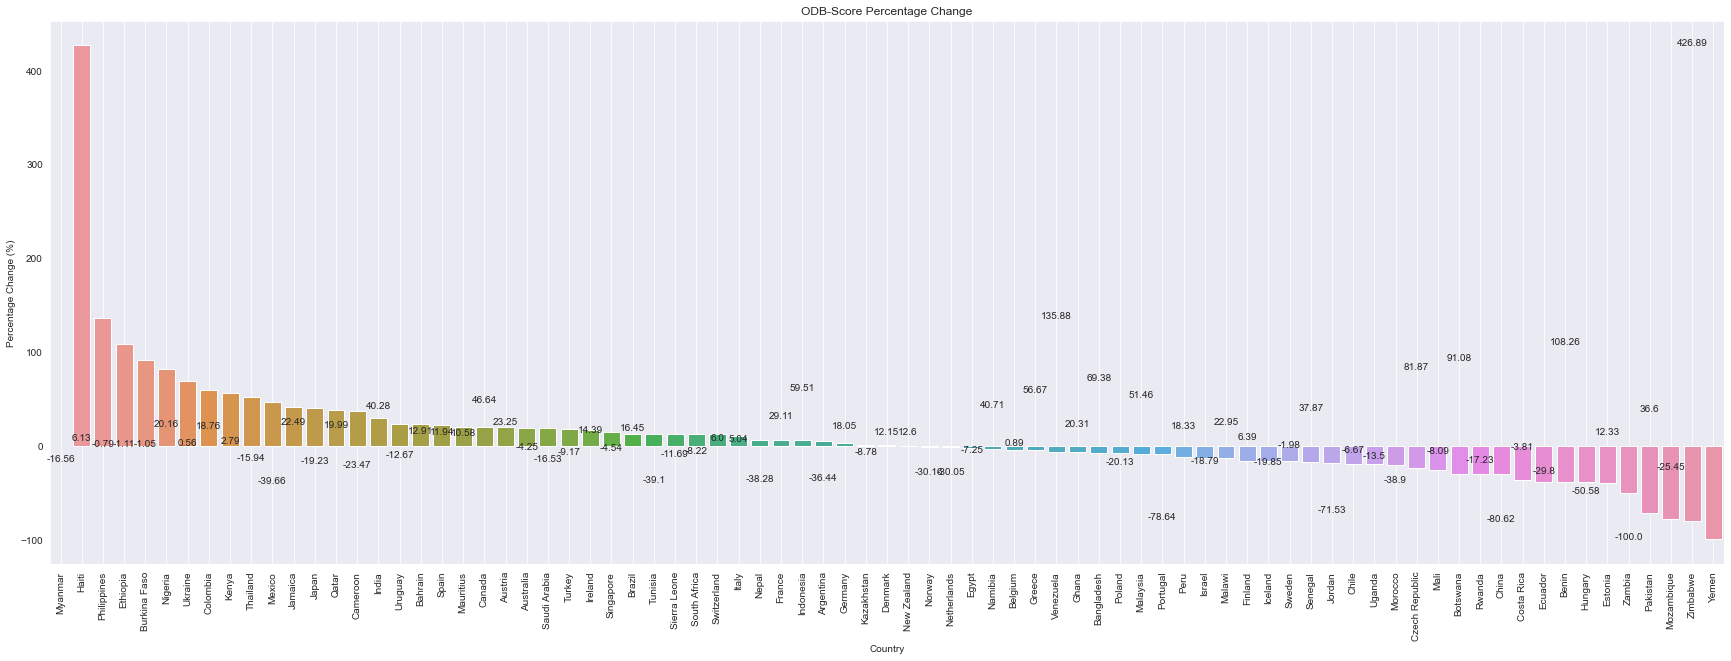

In [164]:
weather_graphing(x_axis, y_axis, "ODB-Score Percentage Change", "Country", "Percentage Change (%)", (3,14))
sns.set_style('darkgrid')

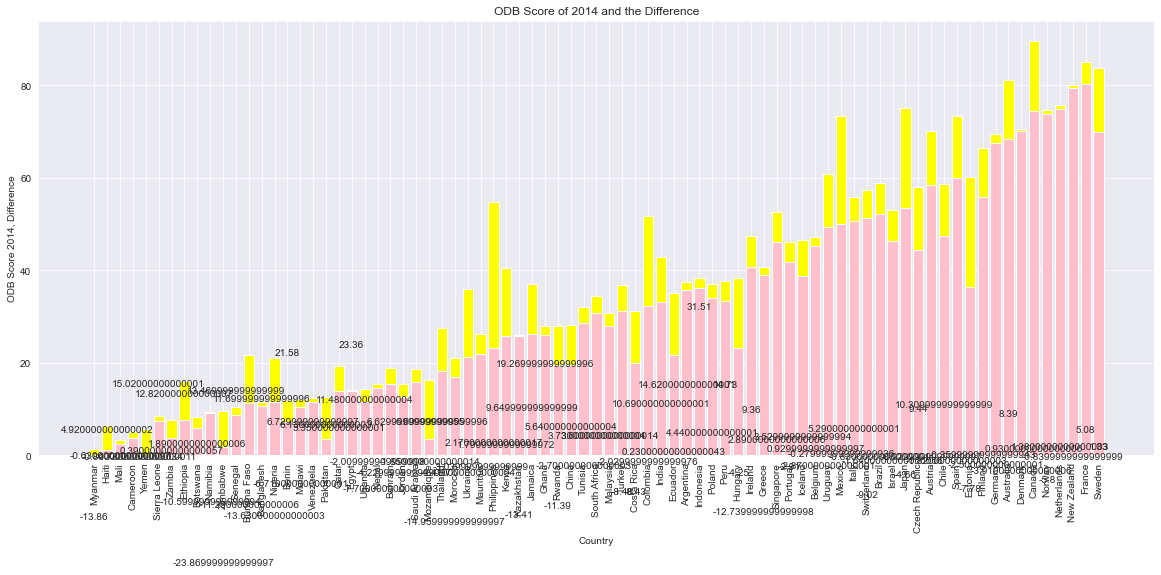

In [173]:
df_1416_odbscore = df_1416_odbscore.sort_values(by="ODB-Score-Scaled_2014")

def addlabels(x,y2):
    for i in range(len(x)):
        plt.text(i, y2[i], y2[i], ha = 'center')

# create data
x = df_1416_odbscore["Country"]
y1 = df_1416_odbscore["ODB-Score-Scaled_2014"]
y2 = df_1416_odbscore['Difference']
plt.figure(figsize=(20,8))
# plot bars in stack manner
plt.bar(x, y1, color='pink')
plt.bar(x, y2, bottom=y1, color='yellow')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("ODB Score 2014, Difference")
plt.title("ODB Score of 2014 and the Difference")
addlabels(x, y2)
plt.show()


# Above was a test to calculate percentage change and the difference between 2016, 2014. Do same calculations for each region of focus.

### Europe - Graph the region Europe in a scatter plot, then calculate percentage change and difference.

In [176]:
df_1416.head()

,Region_2014,ISO,ODB-Rank_2014,Country,ODB-Score-Scaled_2014,Readiness-Scaled_2014,Implementation-Innovation-Scaled_2014,Implementation-Social-Scaled_2014,Implementation-Accountability-Scaled_2014,Implementation-Rank_2014,...,Impact-Political-Scaled_2016,Impact-Social-Scaled_2016,Impact-Economic-Scaled_2016,Impact-Rank_2016,E-Government Rank_2016,E-Government Index_2016,E-Participation Index_2016,Online Service Index_2016,Human Capital Index_2016,Telecommunication Infrastructure Index_2016
0,Europe & Central Asia,SE,3,Sweden,83.70,100,67,81,71,4,...,29,50,32,20,6,0.87039,0.76271,0.87681,0.92096,0.81339
1,Europe & Central Asia,FR,4,France,80.21,91,75,79,61,7,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,East Asia & Pacific,NZ,4,New Zealand,80.01,81,76,83,92,3,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364
3,Europe & Central Asia,NL,6,Netherlands,75.79,95,79,82,56,5,...,63,50,47,16,7,0.86586,0.94915,0.92754,0.91830,0.75173
4,Europe & Central Asia,NO,7,Norway,74.59,88,70,83,58,8,...,92,20,58,13,18,0.81168,0.76271,0.80435,0.90306,0.72764


In [177]:
df_1416.columns

Index(['Region_2014', 'ISO', 'ODB-Rank_2014', 'Country',
       'ODB-Score-Scaled_2014', 'Readiness-Scaled_2014',
       'Implementation-Innovation-Scaled_2014',
       'Implementation-Social-Scaled_2014',
       'Implementation-Accountability-Scaled_2014', 'Implementation-Rank_2014',
       'Impact-Political-Scaled_2014', 'Impact-Social-Scaled_2014',
       'Impact-Economic-Scaled_2014', 'Impact-Rank_2014', 'Cluster-Group',
       'E-Government Rank_2014', 'E-Government Index_2014',
       'E-Participation Index_2014', 'Online Service Index_2014',
       'Human Capital Index_2014',
       'Telecommunication Infrastructure Index_2014', 'ODB-Score-Scaled_2016',
       'Readiness-Scaled_2016', 'Implementation-Innovation-Scaled_2016',
       'Implementation-Social-Scaled_2016',
       'Implementation-Accountability-Scaled_2016', 'Implementation-Rank_2016',
       'Impact-Political-Scaled_2016', 'Impact-Social-Scaled_2016',
       'Impact-Economic-Scaled_2016', 'Impact-Rank_2016',
       '